In [47]:
import pandas as pd
data = pd.read_csv("insurance.csv")

In [31]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [32]:
data.shape


(1338, 7)

In [7]:
print("Number of rows:", data.shape[0])
print("Number of columns:", data.shape[1])

Number of rows: 1338
Number of columns: 7


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [29]:
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,NaN,27.900,0,NaN,NaN,16884.92400
1,18,NaN,33.770,1,NaN,NaN,1725.55230
2,28,NaN,33.000,3,NaN,NaN,4449.46200
3,33,NaN,22.705,0,NaN,NaN,21984.47061
4,32,NaN,28.880,0,NaN,NaN,3866.85520


In [33]:
data['sex'].unique()

array(['female', 'male'], dtype=object)

In [48]:
data['sex']=data['sex'].map({'female':1,'male':0})

In [49]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [50]:
data['smoker']=data['smoker'].map({'yes':1,'no':0})

In [51]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [52]:
data['region']=data['region'].map({'southwest':1,'southeast':2,'northwest':3,'northeast':4})

In [58]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


In [64]:
X=data.drop(['charges'],axis=1)
y=data['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [73]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train

,age,sex,bmi,children,smoker,region
560,46,1,19.950,2,0,3
1285,47,1,24.320,0,0,4
1142,52,1,24.860,0,0,2
969,39,1,34.320,5,0,2
486,54,1,21.470,3,0,3
...,...,...,...,...,...,...
1095,18,1,31.350,4,0,4
1130,39,1,23.870,5,0,2
1294,58,0,25.175,0,0,4
860,37,1,47.600,2,1,1


In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [76]:
lr=LinearRegression()
lr.fit(X_train,y_train)
svm=SVR()
svm.fit(X_train,y_train)
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
gbr=GradientBoostingRegressor()
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

In [77]:
y_pred1=lr.predict(X_test)
y_pred2=svm.predict(X_test)
y_pred3=rf.predict(X_test)
y_pred4=gbr.predict(X_test)

df1=pd.DataFrame({'Actual':y_test,'lr':y_pred1,'svm':y_pred2,'rf':y_pred3,'gbr':y_pred4})

In [78]:
df1

,Actual,lr,svm,rf,gbr
764,9095.06825,8924.407244,9548.268369,10395.548433,11001.128629
887,5272.17580,7116.295018,9492.536262,5135.751659,5840.174656
890,29330.98315,36909.013521,9648.745707,28325.425514,28001.980112
1293,9301.89355,9507.874691,9555.049189,10128.905924,9745.291602
259,33750.29180,27013.350008,9420.451630,34409.224944,33639.100981
...,...,...,...,...,...
109,47055.53210,39116.968669,9648.889239,46899.807911,45431.423211
575,12222.89830,11814.555568,9625.420724,11974.037449,12465.025294
535,6067.12675,7638.107736,9504.186517,6448.864718,6974.336525
543,63770.42801,40959.081722,9605.000400,46975.454940,47862.047791


In [79]:
import matplotlib.pyplot as plt

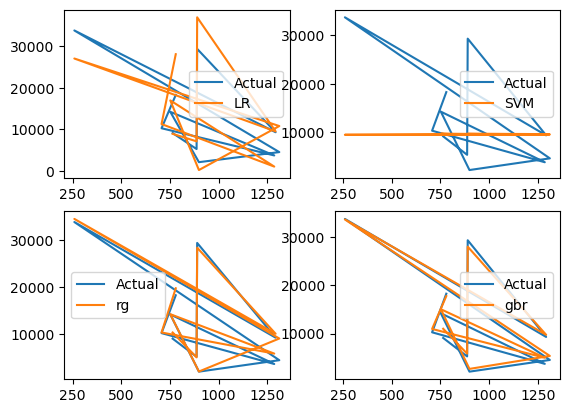

In [86]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['lr'].iloc[0:11],label='LR')
plt.legend()

plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['svm'].iloc[0:11],label='SVM')
plt.legend()

plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['rf'].iloc[0:11],label='rg')
plt.legend()

plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['gbr'].iloc[0:11],label='gbr')
plt.legend()


In [87]:
from sklearn import metrics

In [89]:
score1=metrics.r2_score(y_test,y_pred1)
score2=metrics.r2_score(y_test,y_pred2)
score3=metrics.r2_score(y_test,y_pred3)
score4=metrics.r2_score(y_test,y_pred4)

print(score1,score2,score3,score4)

0.7833463107364539 -0.07229793131123086 0.8640507479918085 0.877993618163719


In [92]:
s1 = metrics.mean_absolute_error(y_test,y_pred1)
s2 = metrics.mean_absolute_error(y_test,y_pred2)
s3 = metrics.mean_absolute_error(y_test,y_pred3)
s4 = metrics.mean_absolute_error(y_test,y_pred4)

print(s1,s2,s3,s4)

4186.508898366434 8592.439160260994 2491.244566796736 2447.167158715136


In [101]:
data = {'age':40,
         'sex':1,
         'bmi':40.3,
        'children':4,
       'smoker':1,
       'region':4}
df=pd.DataFrame(data,index=[0])
df

,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,4


In [109]:
gbr
pred = gbr.predict(df)
pred

array([48538.93610534])

In [110]:
gbr=GradientBoostingRegressor()
gbr.fit(X,y)

GradientBoostingRegressor()

In [111]:
import joblib
joblib.dump(gbr,'model_gbr')

['model_gbr']

In [114]:
model = joblib.load('model_gbr')
new_pred = model.predict(df)
new_pred

array([45249.47004232])